In [205]:
import murenn
import torch
import numpy as np


import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [272]:
def effective_receptive_field_murenn(J, T, N, weight_fn):
    x = torch.zeros(1, 1, N, requires_grad=True)
    dtcwt = murenn.DTCWT(J=J)
    idtcwt = murenn.DTCWTInverse(J=J)
    x_phi, x_psis = dtcwt(x)
    y_psis = []
    for j in range(J):
        x_j = x_psis[j]
        w = weight_fn(1, 1, T) * 2**j
        y_j_re = torch.nn.functional.conv1d(x_j.real, w, padding='same')
        y_j_im = torch.nn.functional.conv1d(x_j.imag, w, padding='same')
        y_j = torch.complex(y_j_re, y_j_im)
        y_psis.append(y_j)

    y = idtcwt((x_phi, y_psis))
    y0 = y[0, :, N//2]
    y0.backward()
    g = np.abs(x.grad.squeeze().numpy())
    return g

def effective_receptive_field_conv(T, N, weight_fn):
    x = torch.zeros(1, 1, N, requires_grad=True)
    w = weight_fn(1, 1, T)
    y = torch.nn.functional.conv1d(x, w, padding='same')
    y0 = y[0, :, N//2]
    y0.backward()
    g = np.abs(x.grad.squeeze().numpy())
    return g

(0.0, 4000.0)

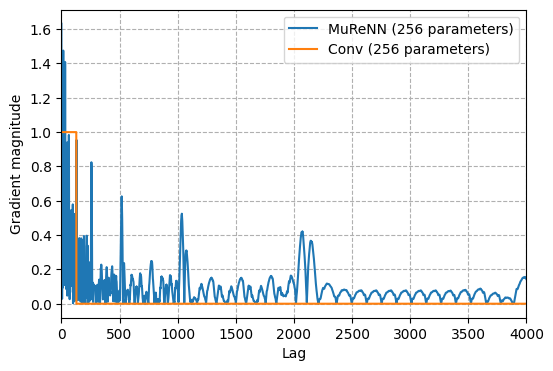

In [274]:
N = 2**16
B = 2**0
plt.figure(figsize=(6, 4))

J = 8
T = 2**5
grads = []
for b in range(B):
    grad = effective_receptive_field_murenn(J, T, N, torch.ones)
    grads.append(grad)
grads = np.array(grads)
median_grad = np.median(grads, axis=0)
quantile_grad = np.quantile(grads, [0.25, 0.75], axis=0)
param_count = J * T
plt.plot(median_grad[N//2:], label=f'MuReNN ({param_count} parameters)')
plt.fill_between(range(N//2), quantile_grad[0, N//2:], quantile_grad[1, N//2:], alpha=0.3)

T = 2**8
grads = []
for b in range(B):
    grad = effective_receptive_field_conv(T, N, torch.ones)
    grads.append(grad)
grads = np.array(grads)
median_grad = np.median(grads, axis=0)
quantile_grad = np.quantile(grads, [0.25, 0.75], axis=0)
plt.plot(median_grad[N//2:], label=f'Conv ({T} parameters)')
plt.fill_between(range(N//2), quantile_grad[0, N//2:], quantile_grad[1, N//2:], alpha=0.3)


plt.grid(linestyle='--')
plt.ylabel('Gradient magnitude')
plt.xlabel('Lag')
plt.legend()
plt.xlim(0, 4000)

/var/folders/fv/kkm71l3d1rx_kjd66cmfpg8r0000gp/T/ipykernel_27353/3598120897.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'$2^{{{int(x)}}}$' for x in plt.gca().get_xticks()])


[Text(0.0, 0, '$2^{0}$'),
 Text(2.0, 0, '$2^{2}$'),
 Text(4.0, 0, '$2^{4}$'),
 Text(6.0, 0, '$2^{6}$'),
 Text(8.0, 0, '$2^{8}$'),
 Text(10.0, 0, '$2^{10}$'),
 Text(12.0, 0, '$2^{12}$'),
 Text(14.0, 0, '$2^{14}$')]

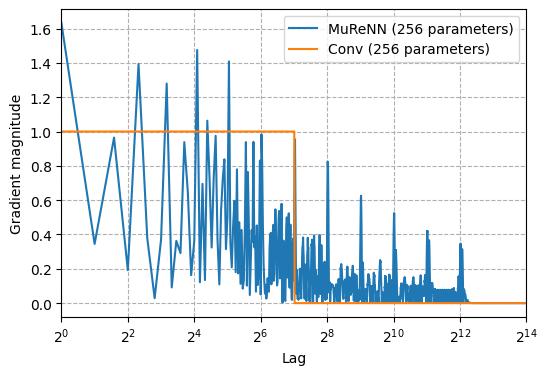

In [276]:
N = 2**16
B = 2**0
t = torch.arange(1, 1+N//2)

plt.figure(figsize=(6, 4))

J = 8
T = 2**5
grads = []
for b in range(B):
    grad = effective_receptive_field_murenn(J, T, N, torch.ones)
    grads.append(grad)
grads = np.array(grads)
median_grad = np.median(grads, axis=0)
quantile_grad = np.quantile(grads, [0.25, 0.75], axis=0)
param_count = J * T
plt.plot(torch.log2(t), median_grad[N//2:], label=f'MuReNN ({param_count} parameters)')
plt.fill_between(torch.log2(t), quantile_grad[0, N//2:], quantile_grad[1, N//2:], alpha=0.3)

T = 2**8
grads = []
for b in range(B):
    grad = effective_receptive_field_conv(T, N, torch.ones)
    grads.append(grad)
grads = np.array(grads)
median_grad = np.median(grads, axis=0)
quantile_grad = np.quantile(grads, [0.25, 0.75], axis=0)
plt.plot(torch.log2(t), median_grad[N//2:], label=f'Conv ({T} parameters)')
plt.fill_between(torch.log2(t), quantile_grad[0, N//2:], quantile_grad[1, N//2:], alpha=0.3)


plt.grid(linestyle='--')
plt.ylabel('Gradient magnitude')
plt.xlabel('Lag')
plt.legend()
plt.xlim(0, 14)
plt.gca().set_xticklabels([f'$2^{{{int(x)}}}$' for x in plt.gca().get_xticks()])

(0.0, 4000.0)

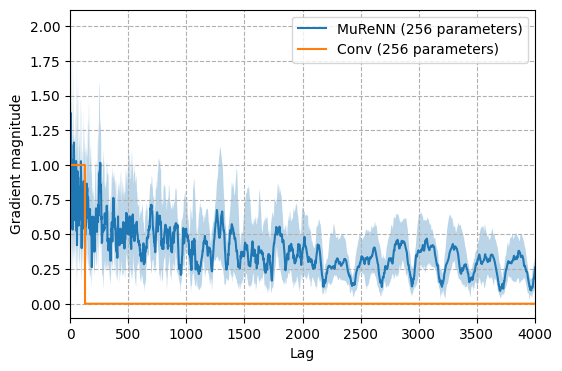

In [273]:
N = 2**16
B = 2**5
plt.figure(figsize=(6, 4))

J = 8
T = 2**5
grads = []
for b in range(B):
    grad = effective_receptive_field_murenn(J, T, N, torch.randn)
    grads.append(grad)
grads = np.array(grads)
median_grad = np.median(grads, axis=0)
quantile_grad = np.quantile(grads, [0.25, 0.75], axis=0)
param_count = J * T
plt.plot(median_grad[N//2:], label=f'MuReNN ({param_count} parameters)')
plt.fill_between(range(N//2), quantile_grad[0, N//2:], quantile_grad[1, N//2:], alpha=0.3)

T = 2**8
grads = []
for b in range(B):
    grad = effective_receptive_field_conv(T, N, torch.ones)
    grads.append(grad)
grads = np.array(grads)
median_grad = np.median(grads, axis=0)
quantile_grad = np.quantile(grads, [0.25, 0.75], axis=0)
plt.plot(median_grad[N//2:], label=f'Conv ({T} parameters)')
plt.fill_between(range(N//2), quantile_grad[0, N//2:], quantile_grad[1, N//2:], alpha=0.3)


plt.grid(linestyle='--')
plt.ylabel('Gradient magnitude')
plt.xlabel('Lag')
plt.legend()
plt.xlim(0, 4000)

/var/folders/fv/kkm71l3d1rx_kjd66cmfpg8r0000gp/T/ipykernel_27353/2177371512.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'$2^{{{int(x)}}}$' for x in plt.gca().get_xticks()])


[Text(0.0, 0, '$2^{0}$'),
 Text(2.0, 0, '$2^{2}$'),
 Text(4.0, 0, '$2^{4}$'),
 Text(6.0, 0, '$2^{6}$'),
 Text(8.0, 0, '$2^{8}$'),
 Text(10.0, 0, '$2^{10}$'),
 Text(12.0, 0, '$2^{12}$'),
 Text(14.0, 0, '$2^{14}$')]

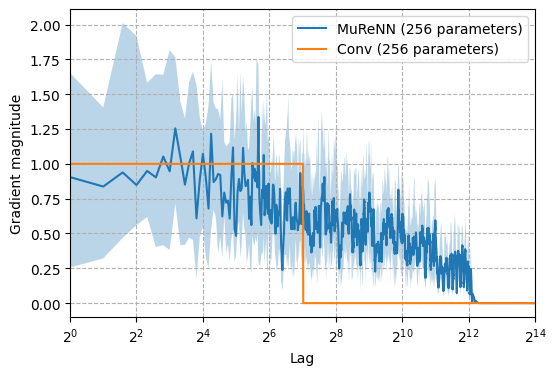

In [275]:
N = 2**16
B = 2**5
t = torch.arange(1, 1+N//2)

plt.figure(figsize=(6, 4))

J = 8
T = 2**5
grads = []
for b in range(B):
    grad = effective_receptive_field_murenn(J, T, N, torch.randn)
    grads.append(grad)
grads = np.array(grads)
median_grad = np.median(grads, axis=0)
quantile_grad = np.quantile(grads, [0.25, 0.75], axis=0)
param_count = J * T
plt.plot(torch.log2(t), median_grad[N//2:], label=f'MuReNN ({param_count} parameters)')
plt.fill_between(torch.log2(t), quantile_grad[0, N//2:], quantile_grad[1, N//2:], alpha=0.3)

T = 2**8
grads = []
for b in range(B):
    grad = effective_receptive_field_conv(T, N, torch.ones)
    grads.append(grad)
grads = np.array(grads)
median_grad = np.median(grads, axis=0)
quantile_grad = np.quantile(grads, [0.25, 0.75], axis=0)
plt.plot(torch.log2(t), median_grad[N//2:], label=f'Conv ({T} parameters)')
plt.fill_between(torch.log2(t), quantile_grad[0, N//2:], quantile_grad[1, N//2:], alpha=0.3)


plt.grid(linestyle='--')
plt.ylabel('Gradient magnitude')
plt.xlabel('Lag')
plt.legend()
plt.xlim(0, 14)
plt.gca().set_xticklabels([f'$2^{{{int(x)}}}$' for x in plt.gca().get_xticks()])